In [38]:
import pandas as pd

data = pd.read_csv("/content/Hasil_Labeling_imdb.csv")

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    9982 non-null   object
 1   sentiment  9982 non-null   object
dtypes: object(2)
memory usage: 156.1+ KB


In [40]:
data.head()

,reviews,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,positive
4,petter mattei love time money visual stun film...,positive


In [41]:
pip install scikit-learn

In [42]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data['reviews'], data['sentiment'], test_size=0.2, random_state=42)

In [44]:
print(f'Jumlah Data Latih: {len(x_train)}')
print(f'Jumlah Data Uji: {len(x_test)}')

Jumlah Data Latih: 7985
Jumlah Data Uji: 1997


In [45]:
# Generate random data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Generate random data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
# Predict test set labels
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[85  8]
 [18 89]]

True Positives(TP) =  85

True Negatives(TN) =  89

False Positives(FP) =  8

False Negatives(FN) =  18


<Axes: >

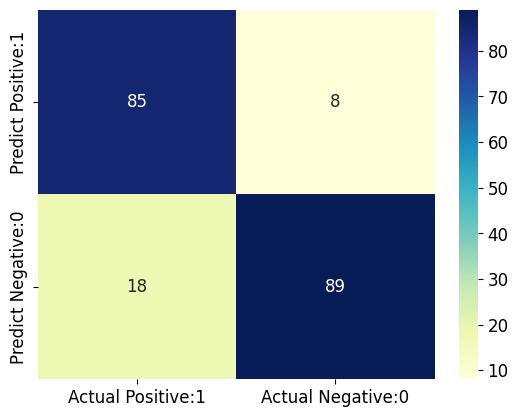

In [49]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.92      0.83      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



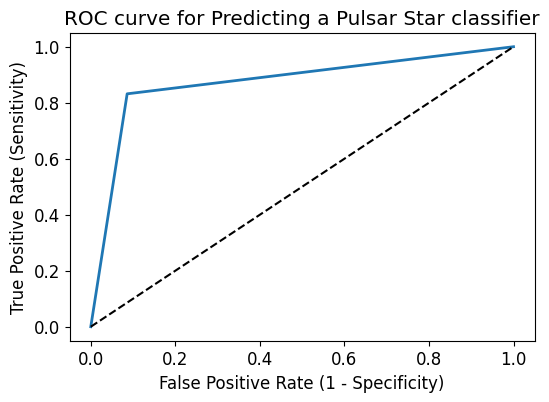

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


In [54]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9340


In [57]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


clf=svm.SVC(kernel='linear')


linear_scores = cross_val_score(clf, X, y, cv=kfold)

In [58]:
print('Stratified cross-validation scores dengan linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores dengan linear kernel:

[0.865 0.865 0.87  0.84  0.92 ]


In [59]:
print('Rata-rata stratified cross-validation score dengan linear kernel:{:.4f}'.format(linear_scores.mean()))

Rata-rata stratified cross-validation score dengan linear kernel:0.8720


In [61]:
rbf_svc=svm.SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [62]:
print('Stratified Cross-validation scores dengan rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores dengan rbf kernel:

[0.845 0.845 0.85  0.815 0.91 ]


In [63]:
print('Rata-rata stratified cross-validation dengan with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Rata-rata stratified cross-validation dengan with rbf kernel:0.8530
